In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [25]:
NUM_CLASSES = 8

# Dataset reading

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │              88 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,158 (4.52 KB)

 Trainable params: 1,158 (4.52 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
14/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0837 - loss: 2.3034
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.0842 - loss: 2.2913 - val_accuracy: 0.0890 - val_loss: 2.1449
Epoch 2/1000
14/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1094 - loss: 2.1574 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1144 - loss: 2.1494 - val_accuracy: 0.1662 - val_loss: 2.0399
Epoch 3/1000
13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1599 - loss: 2.0584 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1646 - loss: 2.0507 - val_accuracy: 0.2094 - val_loss: 1.9766
Epoch 4/1000
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2027 - loss: 1.9959  
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ke

In [34]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8189 - loss: 0.5765


In [35]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [36]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
[2.3535644e-01 3.8878241e-01 2.0741333e-01 4.9035789e-05 2.8246364e-02
 6.6647463e-02 7.1194291e-02 2.3107158e-03]
1


# Confusion matrix

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


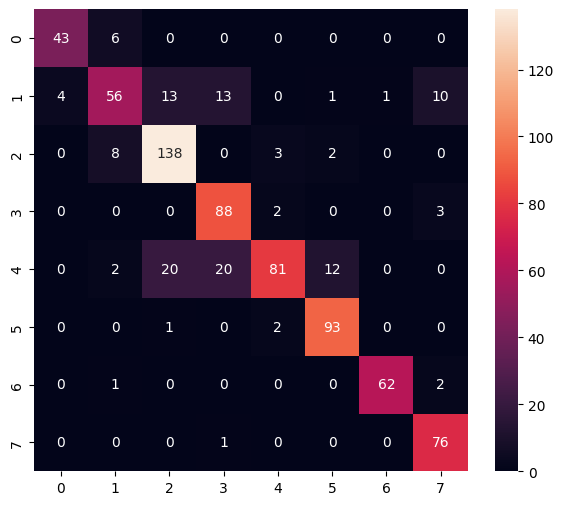

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        49
           1       0.77      0.57      0.65        98
           2       0.80      0.91      0.85       151
           3       0.72      0.95      0.82        93
           4       0.92      0.60      0.73       135
           5       0.86      0.97      0.91        96
           6       0.98      0.95      0.97        65
           7       0.84      0.99      0.90        77

    accuracy                           0.83       764
   macro avg       0.85      0.85      0.84       764
weighted avg       0.84      0.83      0.83       764



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [38]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [39]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\M7020~1.AGH\AppData\Local\Temp\tmpozd2y99w\assets


INFO:tensorflow:Assets written to: C:\Users\M7020~1.AGH\AppData\Local\Temp\tmpozd2y99w\assets


Saved artifact at 'C:\Users\M7020~1.AGH\AppData\Local\Temp\tmpozd2y99w'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  2591002447120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2591002445008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2591002447888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2591002454992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2591002445968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2591002457680: TensorSpec(shape=(), dtype=tf.resource, name=None)


6768

# Inference test

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

D:\venv\Lib\site-packages\tensorflow\lite\python\interpreter.py:452: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [41]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.3535649e-01 3.8878247e-01 2.0741326e-01 4.9035698e-05 2.8246347e-02
 6.6647403e-02 7.1194276e-02 2.3107184e-03]
1
